Ссылку на репозиторий: https://github.com/unterscar/first_project

# Проект спринта "Обучение с учителем"

# Тема "Отток клиентов банка"

# **Описание проекта**

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.<br>
Необходимо спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.<br>
***
Имеются *исторические данные о поведении клиентов и расторжении договоров с банком*.<br>
Необходимо построить *модель с предельно большим значением F1-меры (нужно довести метрику до 0.59)*.<br>
Для оценки качества модели следует проверить F1-меру на тестовой выборке.<br>
Дополнительно измерить AUC-ROC, сравнивая её значение с F1-мерой.

# Цели и задачи проекта

**Цели проекта:**<br>
получить практические навыки построения и настройки модели для задачи классификации, ее проверки на тестовой выборке.<br><br>
**Задачи проекта:**<br>
- построить модель для задачи классификации, которая спрогнозирует отток клиентов банка в ближайшее время;<br>
- настроить модель с учетом метрики F1-мера (довести долю правильных ответов по крайней мере до 0.59);<br>
- проверить метрику F1-мера на тестовой выборке;<br>
- измерить AUC-ROC, сравнивая её значение с F1-мерой.

# **Содержание проекта**

**1. Загрузка файла с данными и изучение общей информации**<br>
<a id='загрузка_файла'></a>
[Шаг 1.1. Загрузка файла](#загрузка_файла_задание)<br>
<a id='изучение_данных'></a>
[Шаг 1.2. Изучение данных](#изучение_данных_задание)<br>
<a id='предобработка_данных'></a>
[Шаг 1.3. Предобработка данных](#предобработка_данных_задание)<br>
<a id='количественные_значения'></a>
[Шаг 1.4. Проверка количественных значений](#количественные_значения_задание)<br>
<a id='категориальные_значения'></a>
[Шаг 1.5. Изучение категориальных значений](#категориальные_значения_задание)<br><br>

**2. Разбивка данных на выборки**<br>
<a id='ohe_данных'></a>
[Шаг 2.1. One-hot кодирование](#ohe_данных_задание)<br>
<a id='разбивка_данных'></a>
[Шаг 2.2. Разбивка данных](#разбивка_данных_задание)<br>
<a id='масштабирование'></a>
[Шаг 2.3. Масштабирование признаков](#масштабирование_задание)<br>

**3. Построение моделей для задач классификации (без учета дисбаланса)**<br>
<a id='построение_модели'></a>
[Шаг 3. Построение моделей](#построение_модели_задание)<br>

<a id='3.1'></a>
[3.1. Алгоритм "Дерево решений"](#3.1_задание)<br>
<a id='3.2'></a>
[3.2. Алгоритм "Случайный лес"](#3.2_задание)<br>
<a id='3.3'></a>
[3.3. Алгоритм "Логистическая регрессия"](#3.3_задание)<br>

**4. Борьба с дисбалансом**<br>
<a id='борьба_дисбаланс'></a>
[Шаг 4.1. Взвешивание классов](#борьба_дисбаланс_задание)<br>
<a id='upsampling'></a>
[Шаг 4.2. Увеличение выборки (Upsampling)](#upsampling_задание)<br>
<a id='downsampling'></a>
[Шаг 4.3. Уменьшение выборки (Downsampling)](#downsampling_задание)<br>

**5. Построение ROC-кривой и AUC-ROC лучшей модели**<br>
<a id='roc_модели'></a>
[Шаг 5. Построение ROC-кривой](#roc_модели_задание)

**6. Проверка модели на тестовой выборке**<br>
<a id='проверка_модели'></a>
[Шаг 6.1. Проверка модели на тестовой выборке](#проверка_модели_задание)<br>
<a id='константная_модель'></a>
[Шаг 6.2. Сравнение качества предсказаний с константной моделью](#константная_модель_задание)<br>

**7. Общий вывод по проекту**<br>
<a id='общий_вывод'></a>
[Шаг 7. Общий вывод](#общий_вывод_задание)

# 1. Загрузка файла с данными и изучение общей информации

## Импорт библиотек и загрузка файла с данными
<a id='загрузка_файла_задание'></a>
[К содержанию](#загрузка_файла)

**1.1.** Импорт библиотек.

In [1]:
!pip install scikit-learn==1.1.3

In [2]:
!pip install imblearn

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib
import re
import tqdm
import time

from scipy import stats as stats
from matplotlib import pyplot as plt

from tqdm import tqdm
#from time import sleep

from sklearn import tree, metrics

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier

from sklearn.metrics import (
    precision_recall_curve,
    classification_report,
    accuracy_score,
    roc_auc_score,
    recall_score,
    f1_score, 
    roc_curve,
    auc
)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

**1.2.** Загрузка файла с данными.

In [4]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except Exception as e:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
    print('Файл успешно загружен!')
except FileNotFoundError:
    print('Файл загрузить не удалось! Проверьте его месторасположение.')
else:
    print('Файл успешно загружен!')

Файл успешно загружен!


## Изучение данных. Предварительные выводы

**1.3.** Изучение общей информации о датафрейме, структуры данных.<br>
<a id='изучение_данных_задание'></a>
[К содержанию](#изучение_данных)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**1.4.** Сброс ограничений на количество выводимых полей таблицы.

In [6]:
pd.set_option('display.max_columns', None)

**1.5.** Установка единообразного отображения вещественных чисел с двумя знаками после запятой.

In [7]:
pd.set_option('display.float_format', '{:,.2f}'.format)

**1.6.** Знакомство с данными, вывод первых десяти строк датафрейма.

In [8]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0
5,6,15574012,Chu,645,Spain,Male,44,8.00,"113,755.78",2,1,0,"149,756.71",1
6,7,15592531,Bartlett,822,France,Male,50,7.00,0.00,2,1,1,"10,062.80",0
7,8,15656148,Obinna,376,Germany,Female,29,4.00,"115,046.74",4,1,0,"119,346.88",1
8,9,15792365,He,501,France,Male,44,4.00,"142,051.07",2,0,1,"74,940.50",0
9,10,15592389,H?,684,France,Male,27,2.00,"134,603.88",1,1,1,"71,725.73",0


**1.7.** Знакомство с данными, вывод последних десяти строк датафрейма.

In [9]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3.00,"35,016.60",1,1,0,"53,667.08",0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4.00,"88,381.21",1,1,0,"69,384.71",1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2.00,0.00,1,1,0,"195,192.40",0
9993,9994,15569266,Rahman,644,France,Male,28,7.00,"155,060.41",1,1,0,"29,179.52",0
9994,9995,15719294,Wood,800,France,Female,29,2.00,0.00,2,0,0,"167,773.55",0
9995,9996,15606229,Obijiaku,771,France,Male,39,5.00,0.00,2,1,0,"96,270.64",0
9996,9997,15569892,Johnstone,516,France,Male,35,10.00,"57,369.61",1,1,1,"101,699.77",0
9997,9998,15584532,Liu,709,France,Female,36,7.00,0.00,1,0,1,"42,085.58",1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.00,"75,075.31",2,1,0,"92,888.52",1
9999,10000,15628319,Walker,792,France,Female,28,NaN,"130,142.79",1,1,0,"38,190.78",0


**1.8.** Знакомство с данными, вывод случайной выборки из датафрейма.

In [10]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4620,4621,15798960,Meng,680,France,Male,33,2.00,"108,393.35",1,0,1,"39,057.67",0
4594,4595,15661532,Butusov,650,France,Female,31,1.00,"160,566.11",2,0,0,"27,073.81",0
3997,3998,15690620,Olisaemeka,665,France,Male,39,10.00,"46,323.57",1,1,0,"136,812.02",0
2338,2339,15806307,Favors,537,France,Male,37,3.00,0.00,2,1,1,"20,603.32",0
3998,3999,15737071,Tang,639,France,Female,60,5.00,"162,039.78",1,1,1,"84,361.72",1
246,247,15685500,Glazkov,772,Germany,Male,26,7.00,"152,400.51",2,1,0,"79,414.00",0
9726,9727,15662494,Goliwe,773,Spain,Male,43,7.00,"138,150.57",1,1,1,"177,357.16",0
3438,3439,15722404,Carpenter,445,France,Female,30,3.00,0.00,2,1,1,"127,939.19",0
4500,4501,15697318,Ifeatu,771,Germany,Male,32,9.00,"77,487.20",1,0,0,"33,143.04",0
9742,9743,15620577,Wood,715,France,Male,45,4.00,0.00,2,1,1,"55,043.93",0


> **Предварительный вывод по данным**

Согласно документации к данным.

**Признаки:**<br>
- **RowNumber** — *индекс строки в данных*
- **CustomerId** — *уникальный идентификатор клиента*
- **Surname** — *фамилия*
- **CreditScore** — *кредитный рейтинг*
- **Geography** — *страна проживания*
- **Gender** — *пол*
- **Age** — *возраст*
- **Tenure** — *сколько лет человек является клиентом банка*
- **Balance** — *баланс на счёте*
- **NumOfProducts** — *количество продуктов банка, используемых клиентом*
- **HasCrCard** — *наличие кредитной карты*
- **IsActiveMember** — *активность клиента*
- **EstimatedSalary** — *предполагаемая зарплата*

**Целевой признак:**<br>
- **Exited** — *факт ухода клиента*

1. В датафрейме **10000 записей, 14 полей**.
2. В поле **Tenure** имеются **пропущенные значения**. Необходимо изучить более детально, рассмотреть возможность удаления записей с незаполненными значениями по данному полю таблицы.
3. Нарушение стиля в заголовках полей, следует изменить регистр.
4. Для поля **Tenure** видится возможным **изменение типа данных** на int64 для снижения нагрузки и удобства визуализации данных (отсутствия дробных частей в лейблах/подписях).
5. Поля **RowNumber**, **CustomerId**, **Surname** не внесут никакого смыслового вклада в модель, их предполагается удалить. 
6. В поле **Geography** для удобства работы с данными видится возможным изменение регистра.
7. В поле **Gender** для удобства работы с данными и снижения нагрузки видится возможным замена классификации более краткими обозначениями: **Male - m, Female - f**.
8. В полях таблицы **Geography**, **Gender** возможны дубликаты. Следует рассмотреть уникальные значения.

## Предобработка данных (всей таблицы и по полям)

**1.9.** Предобработка данных таблицы.<br>
<a id='предобработка_данных_задание'></a>
[К содержанию](#предобработка_данных)

**a)** Удаление полей RowNumber, CustomerId, Surname.

In [11]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


**b)** Переименование полей таблицы (приведение к snake_case).

In [13]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            9091 non-null   float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [15]:
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


**c)** Замена обозначений в поле Gender.

In [16]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
df.loc[df['gender'] == 'Male', 'gender'] = 'm'

In [18]:
df.loc[df['gender'] == 'Female', 'gender'] = 'f'

In [19]:
df.sample(10)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
3081,693,France,m,29,2.00,"151,352.74",1,0,0,"197,145.89",0
3819,553,Germany,m,46,3.00,"82,291.10",1,1,0,"112,549.99",1
8241,565,France,m,32,9.00,0.00,2,1,0,"5,388.30",0
2703,459,Germany,m,46,7.00,"110,356.42",1,1,0,"4,969.13",1
2689,414,France,m,38,8.00,0.00,1,0,1,"77,661.12",1
1027,737,Germany,m,35,0.00,"133,377.80",1,0,1,"64,050.19",0
7393,599,France,m,28,7.00,"119,706.22",1,0,0,"31,190.42",0
1971,582,Spain,m,26,4.00,"65,848.36",2,1,0,"30,149.21",0
8523,690,Germany,f,54,1.00,"144,027.80",1,1,1,"108,731.02",1
4753,454,Spain,m,40,2.00,"123,177.01",1,1,0,"148,309.98",0


**d)** Приведение географических наименований в поле Geography к нижнему регистру.

In [20]:
df['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [21]:
df['geography'] = df['geography'].str.lower()

In [22]:
df.sample(10)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
677,739,germany,m,45,7.00,"102,703.62",1,0,1,"147,802.94",1
7455,550,germany,m,33,4.00,"118,400.91",1,0,1,"13,999.64",1
8764,773,germany,m,51,8.00,"116,197.65",2,1,1,"86,701.40",0
9639,761,spain,f,32,4.00,"103,515.39",2,1,1,"177,622.38",0
2408,653,spain,m,55,7.00,0.00,2,1,1,"41,967.03",0
1204,630,france,f,40,NaN,0.00,2,1,1,"34,453.17",0
6141,572,france,m,24,1.00,0.00,2,1,1,"151,460.84",0
2104,768,france,m,42,5.00,0.00,3,0,0,"60,686.40",0
4837,803,france,m,28,3.00,0.00,2,1,0,"159,654.00",0
3422,679,germany,m,35,1.00,"130,463.55",2,1,1,"37,341.17",0


**e)** Поиск явных дубликатов в таблице.

In [23]:
print("Количество дубликатов в таблице:", df.duplicated().sum())

Количество дубликатов в таблице: 0


## Проверка количественных значений
(анализ пропусков, дубликатов, аномальных значений)

**1.10.** Проверка количественных значений.<br>
<a id='количественные_значения_задание'></a>
[К содержанию](#количественные_значения)

**a)** Анализ количества пропусков в поле Tenure.

In [24]:
print(
    'Количество пропущенных значений в поле Tenure: {:.2%}'.format(df['tenure'].isnull().sum()/df['tenure'].shape[0])
)

Количество пропущенных значений в поле Tenure: 9.09%


*В поле Tenure содержатся сведения о том, сколько лет человек является клиентом банка.*<br>
Заменить пропуски на медианное или среднее значение видится некорректным.

Ver.0, не актуально<br>
*Возможна замена пропусков на значение, равное 0. Но на отток клиентов из банка в том числе может влиять и данный признак. Теоретически, клиенты, пользующиеся услугами банка несколько лет, могут реже задумываться о смене банка.<br>
Замена пропусков на значение, равное 0, может привести к искажению данных.<br><br>
Рассчитаем коэффициент точечно-бисериальной корреляции между признаками Exited, Tenure до замены пропусков на 0 и после, посмотрим, насколько он изменится (так как результат расчета коэффициентов с помощью функций pointbiserialr() и corr() будет практически идентичный, воспользуемся последней).*

In [25]:
#print('Коэффициент корреляции между признаками Exited, Tenure (до замены):')
#print(stats.pointbiserialr(df['exited'], df['tenure']))
#print('{:,.4f}'.format(df['exited'].corr(df['tenure'])))

Ver.0, не актуально<br>
*Коэффициент корреляции практически равен нулю, что говорит об отсутствии линейной взаимосвязи между переменными.*

**b)** Замена пропусков в поле Tenure на значение, равное медиане.

In [26]:
#df = df.fillna(0)

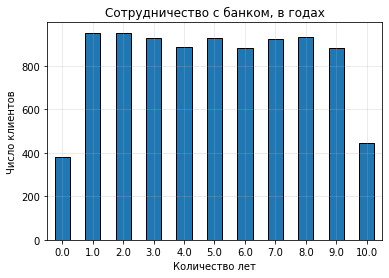

In [27]:
df.pivot_table(
    index=df['tenure'].tolist(),
    values='tenure',
    aggfunc='count'
).plot.bar(legend=False, title='Сотрудничество с банком, в годах', edgecolor='black', linewidth=1)

plt.grid(True, alpha=0.3)

plt.xticks(rotation=0)
plt.xlabel('Количество лет')
plt.ylabel('Число клиентов')

plt.show()

In [28]:
df = df.fillna(df['tenure'].median())

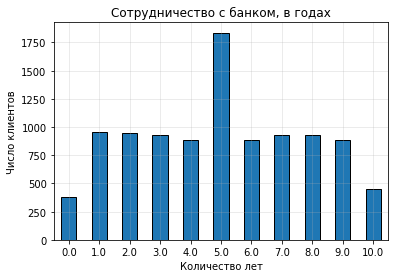

In [29]:
df.pivot_table(
    index=df['tenure'].tolist(),
    values='tenure',
    aggfunc='count'
).plot.bar(legend=False, title='Сотрудничество с банком, в годах', edgecolor='black', linewidth=1)

plt.grid(True, alpha=0.3)

plt.xticks(rotation=0)
plt.xlabel('Количество лет')
plt.ylabel('Число клиентов')

plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [31]:
#print('Коэффициент корреляции между признаками Exited, Tenure (после замены):')
#print(stats.pointbiserialr(df['exited'], df['tenure']))
#print('{:,.4f}'.format(df['exited'].corr(df['tenure'])))

Ver.0, не актуально<br>
*Коэффициент корреляции незначительно понизился, также наблюдается отсутствие линейной взаимосвязи между переменными.<br>
Оставим замену пропусков в поле Tenure на значение, равное 0.*

**c)** Изменение типа данных float64 на тип данных int64 в поле Tenure.

In [32]:
df['tenure'] = df['tenure'].astype('int64')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


**1.11.** Анализ статистических показателей для каждого признака.

**a)** Создание списков с полями, содержащими количественные / категориальные значения.

In [34]:
quantitative_values = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

In [35]:
categorical_values = ['geography', 'gender', 'tenure', 'has_cr_card', 'is_active_member', 'exited']

**b)** Анализ статистических показателей для полей с количественными значениями.

In [36]:
df.drop(categorical_values, axis=1).describe()

,credit_score,age,balance,num_of_products,estimated_salary
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,650.53,38.92,"76,485.89",1.53,"100,090.24"
std,96.65,10.49,"62,397.41",0.58,"57,510.49"
min,350.00,18.00,0.00,1.00,11.58
25%,584.00,32.00,0.00,1.00,"51,002.11"
50%,652.00,37.00,"97,198.54",1.00,"100,193.91"
75%,718.00,44.00,"127,644.24",2.00,"149,388.25"
max,850.00,92.00,"250,898.09",4.00,"199,992.48"


- Поле **"credit_score"**: медианное значение (652) больше среднего (650), следовательно, данные немного смещены вправо; клиентов с кредитным рейтингом ниже или равным среднему значению меньше, имеется группа клиентов с достаточно высоким рейтингом.
- Поле **"age"**: минимальный возраст - 18 лет, корректно, максимальный возраст - 92 года, корректно. Данные немного смещены влево; клиентов среднего и старшего возраста меньше тех, кто младше 37 лет.
- Поле **"balance"**: медианное значение (97198) больше среднего (76485), данные смещены вправо; но имеется значительная группа клиентов с нулевым балансом на счете (3617 человек), из них ушедших из банка только 500 человек.
- Поле **"num_of_products"**: данные смещены влево; все клиенты банка используют как минимум 1 продукт, максимальное количество используемых продуктов - 4; большая часть клиентов использует 1 продукт.
- Поле **"estimated_salary"**: медианное значение (100193) незначительно больше среднего (100090); клиентов с предполагаемой зарплатой, выше среднего значения, столько же, сколько и клиентов с зарплатой, ниже среднего.

In [37]:
print('Количество клиентов с нулевым балансом на счете:', df.loc[df['balance'] == 0].shape[0])

Количество клиентов с нулевым балансом на счете: 3617


In [38]:
print(
    'Доля клиентов с нулевым балансом на счете: {:,.2f} %'.format(len(df.loc[df['balance'] == 0]) / df.shape[0] * 100)
)

Доля клиентов с нулевым балансом на счете: 36.17 %


In [39]:
print(
    'Количество клиентов с нулевым балансом на счете, ушедших из банка:', \
    df.loc[(df['balance'] == 0) & (df['exited'] == 1)].shape[0]
)

Количество клиентов с нулевым балансом на счете, ушедших из банка: 500


In [40]:
client_num_of_products_pivot = df.pivot_table(
    index=df['num_of_products'].tolist(),
    values='num_of_products',
    aggfunc='count'
)

client_num_of_products_pivot.columns = ['count_clients']

client_num_of_products_pivot['count_clients,%'] = (client_num_of_products_pivot['count_clients'] 
                                                   / df.shape[0] * 100)

print('Распределение клиентов по числу используемых продуктов банка:')

client_num_of_products_pivot

Распределение клиентов по числу используемых продуктов банка:


,count_clients,"count_clients,%"
1,5084,50.84
2,4590,45.90
3,266,2.66
4,60,0.60


**1.12.** Анализ возможных выбросов в выборке.

**a)** Построение графиков распределений значений признаков.

In [41]:
def plots(data, data_label, n_bins):
    
    a, axes = plt.subplots(1, 2, figsize=(16,4))
    
    axes[0].set_title('частота распределения', fontsize=14)
    axes[0].set_ylabel('частота', fontsize=14)
    axes[0].set_xlabel(data_label, fontsize=14)
    
    data.hist(bins=n_bins, ax=axes[0], edgecolor='black', linewidth=1)
            
    axes[1].set_title('boxplot', fontsize=14)
    axes[1].set_xlabel(data_label, fontsize=14)
    
    sns.boxplot(data=df, x=data_label, ax=axes[1], linewidth=1)
    
    plt.grid(True, alpha=0.3)
    
    plt.show() 

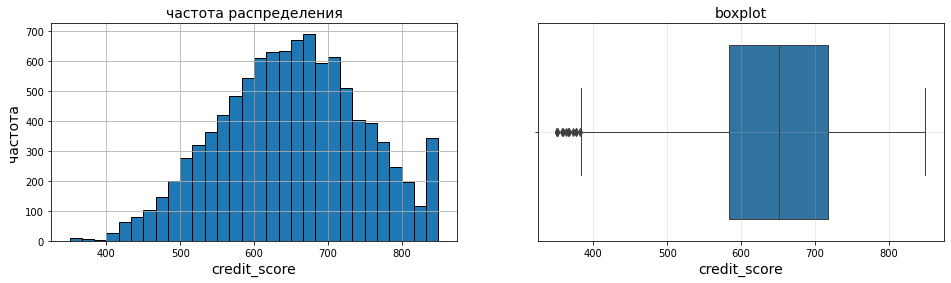

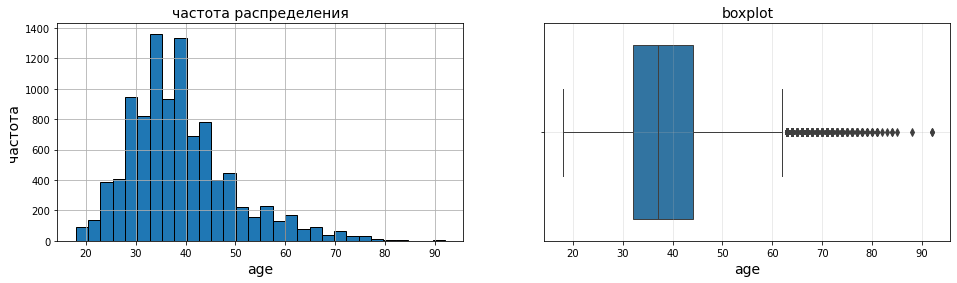

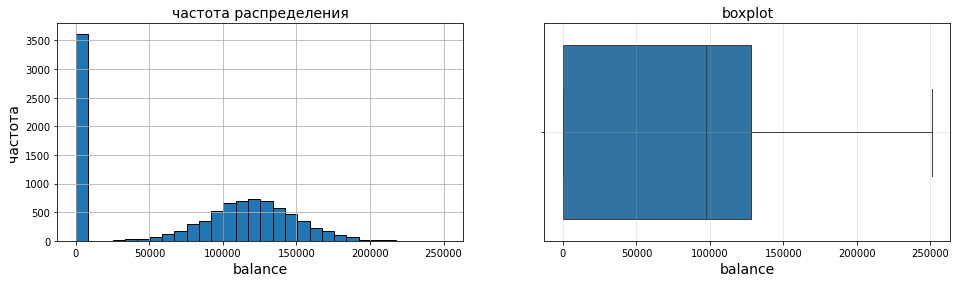

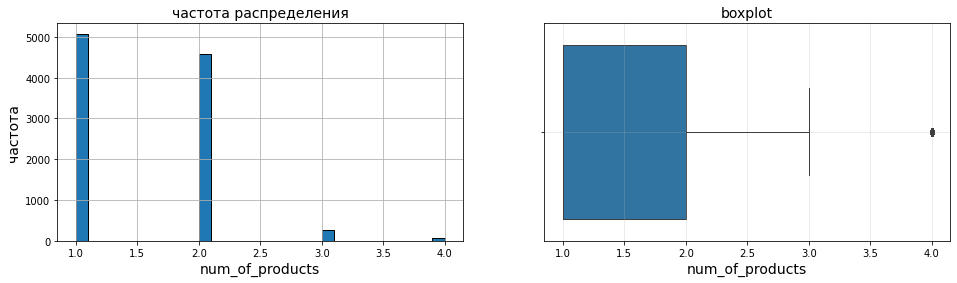

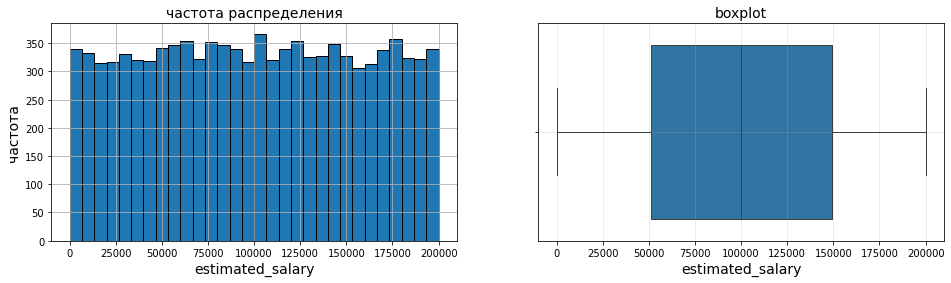

In [42]:
for column in df.drop(categorical_values, axis=1).columns:
    
    plots(df[column], column, n_bins=30)

Для трех полей наблюдаются выбросы.

**b)** Расчет доли выбросов от общего количества данных.

In [43]:
def outliers_test_right(df, column):
    
    x_max = df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))
    x_max_rate = len(df.loc[df[column] > x_max]) / df.shape[0] * 100
    
    print('Доля выбросов в параметре {}: {:,.2f} %'.format(column, x_max_rate))

In [44]:
def outliers_test_left(df, column):
    
    x_max = df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))
    x_max_rate = len(df.loc[df[column] < x_max]) / df.shape[0] * 100
    
    print('Доля выбросов в параметре {}: {:,.2f} %'.format(column, x_max_rate))

In [45]:
outliers_test_left(df, 'credit_score')

Доля выбросов в параметре credit_score: 0.15 %


Для параметра 'credit_score' выбросами являются значения кредитного рейтинга, близкого к 350.<br>
Согласно методике НБКИ, требования к которой устанавливаются ЦБ, низким полагается ПКР в диапазоне от 1 до 149.<br>
В рассматриваемом банке минимальный ПКР клиента равен 350.<br>
*Данные будем полагать корректными, оставим без изменения.*

In [46]:
outliers_test_right(df, 'age')

Доля выбросов в параметре age: 3.59 %


Для поля 'age' выбросами являются значения возраста пожилых клиентов.<br>
*Данные будем полагать корректными, оставим без изменения.*

In [47]:
outliers_test_right(df, 'num_of_products')

Доля выбросов в параметре num_of_products: 0.60 %


Для поля 'num_of_products' выбросами является количество клиентов, использующих 4 продукта банка.<br>
*Данные будем полагать корректными, оставим без изменения.*

> **Выводы**

- Произведена **замена пропусков** в поле Tenure на значение, равное медиане.
- Изменен тип данных float64 на **тип данных int64** в поле Tenure.
- Доля выбросов по каждому признаку не превышает 3.6%. 
- Данные выбросы выглядят вполне реалистично, их можно отнести к контекстным выбросам.
- Исходя из особенностей выборки **данные оставим без изменений (выбросы не будут удалены)**.

## Изучение категориальных значений
(анализ дубликатов, уникальности значений)

**1.13.** Изучение категориальных значений.<br>
<a id='категориальные_значения_задание'></a>
[К содержанию](#категориальные_значения)

**a)** Анализ дубликатов, уникальности значений для полей, содержащих категориальные значения.

In [48]:
def unique_categorical_values(df, column):
    
    unique_list = df[column].sort_values().unique()
    
    print('Уникальные значения для параметра {}: {}'.format(column, unique_list))

In [49]:
unique_categorical_values(df, 'geography')

Уникальные значения для параметра geography: ['france' 'germany' 'spain']


In [50]:
unique_categorical_values(df, 'gender')

Уникальные значения для параметра gender: ['f' 'm']


In [51]:
unique_categorical_values(df, 'tenure')

Уникальные значения для параметра tenure: [ 0  1  2  3  4  5  6  7  8  9 10]


In [52]:
unique_categorical_values(df, 'has_cr_card')

Уникальные значения для параметра has_cr_card: [0 1]


In [53]:
unique_categorical_values(df, 'is_active_member')

Уникальные значения для параметра is_active_member: [0 1]


In [54]:
unique_categorical_values(df, 'exited')

Уникальные значения для параметра exited: [0 1]


*Некорректные значения в полях, содержащих категориальные значения, отсутствуют.*

**b)** Группировка и визуализация данных по полям, содержащим категориальные значения.

In [55]:
def create_pie_plot(data, title):
    
    fig = plt.figure(figsize=(12,6))
    fig.suptitle(title, fontsize=12)
    
    plt.pie(
        data.value_counts().sort_index(ascending=True),
        labels=data.value_counts().sort_index(ascending=True).tolist(),
        labeldistance=1.1,
        autopct='%.2f%%',
        pctdistance=0.6,
        colors=plt.cm.tab20.colors,
        shadow=True
    )
    
    plt.legend(labels=data.unique().tolist(), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.show()

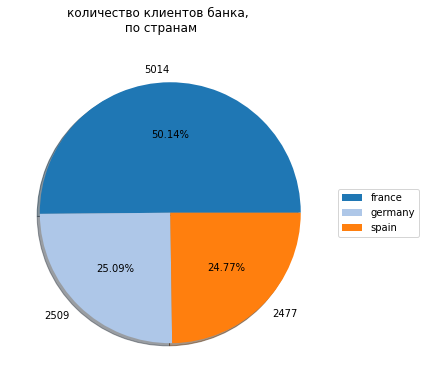

In [56]:
create_pie_plot(df['geography'].sort_values(), 'количество клиентов банка, \n по странам')

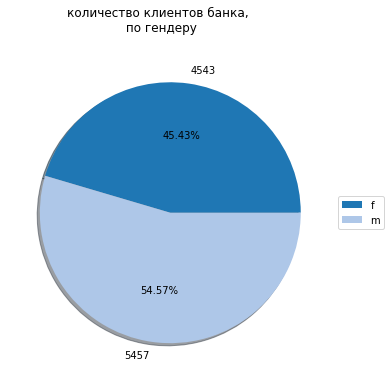

In [57]:
create_pie_plot(df['gender'], 'количество клиентов банка, \n по гендеру')

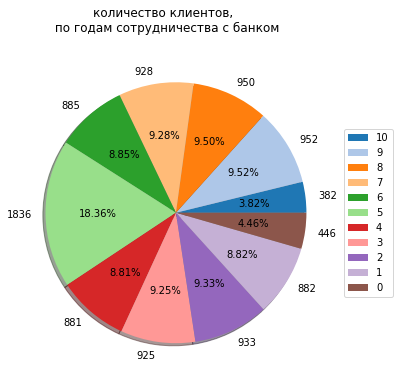

In [58]:
create_pie_plot(df['tenure'].sort_values(ascending=False), 'количество клиентов, \n по годам сотрудничества с банком')

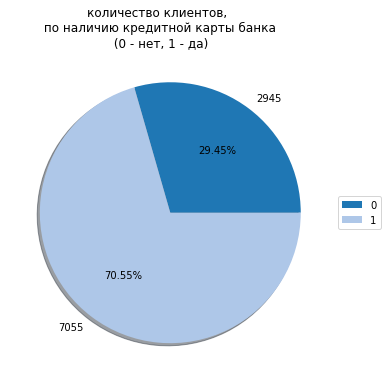

In [59]:
create_pie_plot(
    df['has_cr_card'].sort_values(), 'количество клиентов, \n по наличию кредитной карты банка \n (0 - нет, 1 - да)'
)

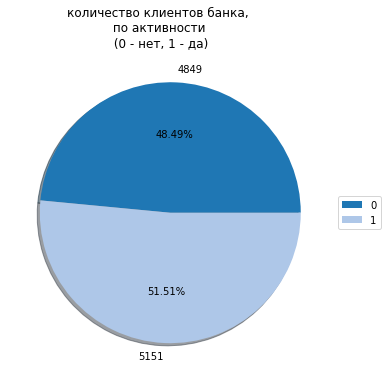

In [60]:
create_pie_plot(df['is_active_member'].sort_values(), 'количество клиентов банка, \n по активности \n (0 - нет, 1 - да)')

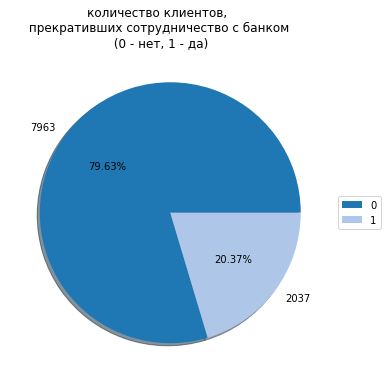

In [61]:
create_pie_plot(df['exited'].sort_values(), 'количество клиентов, \n прекративших сотрудничество с банком \n (0 - нет, 1 - да)')

Таким образом, среди клиентов банка:
- половина клиентов - граждане Франции,
- мужчин приблизительно на 5% больше женщин,
- длительное время (10 лет) сотрудничает только 4.5% клиентов,
- с каждым годом наблюдается небольшой прирост,
- почти 71% клиентов завели кредитную карту,
- количество активных и неактивных клиентов отличается незначительно,
- 20% перестали с банком сотрудничать.

**c)** Попарная группировка и визуализация данных с целевым признаком.

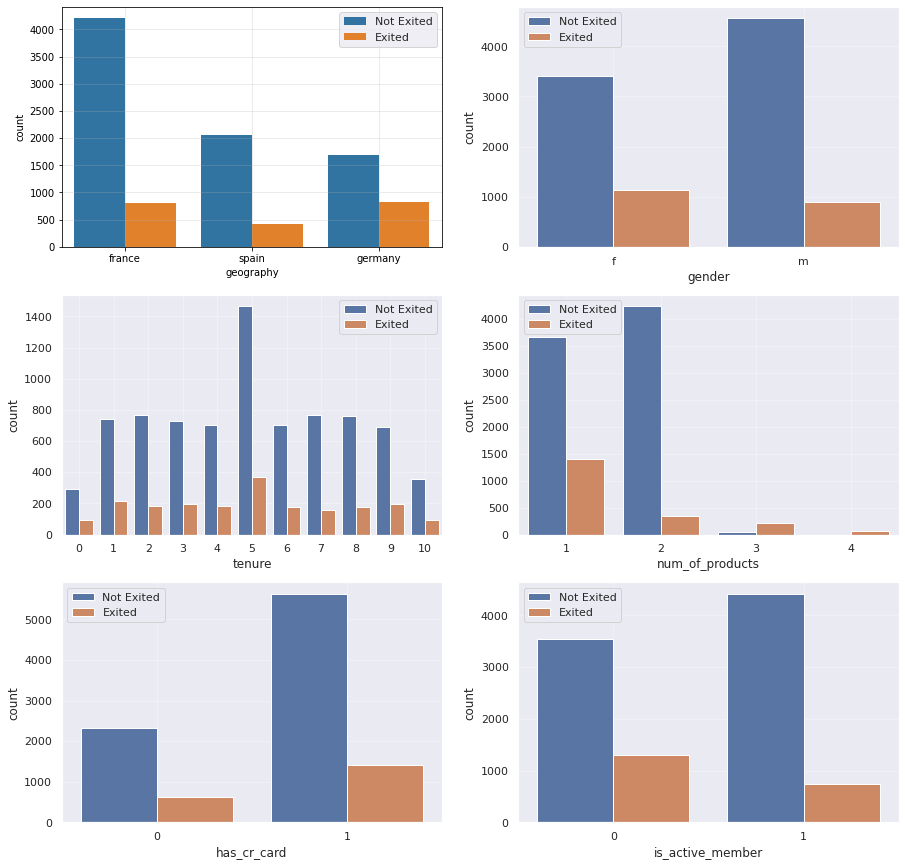

In [62]:
plt.figure(figsize=(15,15))

columns = ['geography', 'gender', 'tenure', 'num_of_products', 'has_cr_card', 'is_active_member']

for i in range(6):
    
    plt.subplot(3, 2, i + 1)
   
    sns.countplot(data=df, x=columns[i], hue='exited')
    
    plt.grid(True, alpha=0.3)
    sns.set(style="darkgrid")
    
    plt.xticks(rotation=0)
    plt.legend(["Not Exited", "Exited"])
    
plt.show()

> **Выводы**

- **Некорректные значения** в полях, содержащих категориальные значения, **отсутствуют**.
- Каждый год наблюдается незначительный прирост клиентов банка, имеется существенная необходимость в удержании старых клиентов. 
- Количество активных и неактивных клиентов банка отличается незначительно. *Требуется уточнение у маркетологов, что подразумевается под активностью*.
- За период, соответствующий выборке, с банком прекратили сотрудничество 20% клиентов.
- Сотрудничество с банком прекратила значительная часть граждан Германии (32%), при этом их доля среди клиентов банка составляет 25%.
- Доля клиентов, использующих более 3 продуктов банка - 3.26%. Доля клиентов, использующих только 1 продукт и прекративших сотрудничество с банком - 14%. Следует пересмотреть продуктовую линию.

# 2. Разбивка данных на выборки

**2.1.** One-hot кодирование категориальные признаков.<br>
<a id='ohe_данных_задание'></a>
[К содержанию](#ohe_данных)<br>

In [63]:
df_ohe = pd.get_dummies(df, columns=['geography', 'gender'], prefix=['geo', 'gender'], drop_first=True)
df_ohe.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is_active_member', 'estimated_salary', 'exited',
       'geo_germany', 'geo_spain', 'gender_m'],
      dtype='object')

In [64]:
df_ohe.head(10)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geo_germany,geo_spain,gender_m
0,619,42,2,0.00,1,1,1,"101,348.88",1,0,0,0
1,608,41,1,"83,807.86",1,0,1,"112,542.58",0,0,1,0
2,502,42,8,"159,660.80",3,1,0,"113,931.57",1,0,0,0
3,699,39,1,0.00,2,0,0,"93,826.63",0,0,0,0
4,850,43,2,"125,510.82",1,1,1,"79,084.10",0,0,1,0
5,645,44,8,"113,755.78",2,1,0,"149,756.71",1,0,1,1
6,822,50,7,0.00,2,1,1,"10,062.80",0,0,0,1
7,376,29,4,"115,046.74",4,1,0,"119,346.88",1,1,0,0
8,501,44,4,"142,051.07",2,0,1,"74,940.50",0,0,0,1
9,684,27,2,"134,603.88",1,1,1,"71,725.73",0,0,0,1


**2.2.** Выделение признаков.<br>
<a id='разбивка_данных_задание'></a>
[К содержанию](#разбивка_данных)

В исходных данных выделим и сохраним в отдельные переменные признаки (**features**) и целевой признак (**target**):<br>
- признаки: *'credit_score', 'geography', 'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary'*;<br>
- целевой признак: *'exited'*.

In [65]:
features = df_ohe.drop(['exited'], axis=1)
target = df_ohe['exited']

**2.3.** Изучение целевого признака на сбалансированность.

In [66]:
target.value_counts(normalize=True)

0   0.80
1   0.20
Name: exited, dtype: float64

*Целевой признак в представленных данных не сбалансирован. Соотношение классов 1:4.*

**2.4.** Разбивка данных на выборки.

Разделим данные на выборки (обучающую, валидационную, тестовую) в следующей пропорции соответственно:<br>
**3:1:1 (train : valid : test)**.

In [67]:
RANDOM_STATE=12345

In [68]:
features, features_test, target, target_test = train_test_split(
    features, target,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=target
)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target,
    train_size=0.75,
    random_state=RANDOM_STATE,
    stratify=target
) 

In [69]:
print(f'Признаки обучающей выборки: {features_train.shape}')
print(f'Целевой признак обучающей выборки: {target_train.shape}')
print(f'Количество признаков в target_train по классам: {np.bincount(target_train)}')
print()

print(f'Признаки валидационной выборки: {features_valid.shape}')
print(f'Целевой признак валидационной выборки: {target_valid.shape}')
print(f'Количество признаков в target_valid по классам: {np.bincount(target_valid)}')
print()

print(f'Признаки тестовой выборки: {features_test.shape}')
print(f'Целевой признак тестовой выборки: {target_test.shape}')
print(f'Количество признаков в target_test по классам: {np.bincount(target_test)}')

Признаки обучающей выборки: (6000, 11)
Целевой признак обучающей выборки: (6000,)
Количество признаков в target_train по классам: [4777 1223]

Признаки валидационной выборки: (2000, 11)
Целевой признак валидационной выборки: (2000,)
Количество признаков в target_valid по классам: [1593  407]

Признаки тестовой выборки: (2000, 11)
Целевой признак тестовой выборки: (2000,)
Количество признаков в target_test по классам: [1593  407]


In [70]:
print('Размер обучающей выборки - {:.0%}'.format(target_train.shape[0] / target.shape[0]))
print('Размер валидационной выборки - {:.0%}'.format(target_valid.shape[0] / target.shape[0]))
print('Размер тестовой выборки - {:.0%}'.format(target_test.shape[0] / target.shape[0]))

Размер обучающей выборки - 75%
Размер валидационной выборки - 25%
Размер тестовой выборки - 25%


**2.5.** Масштабирование количественных признаков.<br>
<a id='масштабирование_задание'></a>
[К содержанию](#масштабирование)

In [71]:
scaler = StandardScaler()
scaler.fit(features_train[quantitative_values])

features_train[quantitative_values] = scaler.transform(features_train[quantitative_values])
features_valid[quantitative_values] = scaler.transform(features_valid[quantitative_values])
features_test[quantitative_values] = scaler.transform(features_test[quantitative_values])

# 3. Построение моделей для задач классификации (без учета дисбаланса)
<a id='построение_модели_задание'></a>
[К содержанию](#построение_модели)

Создание списков для хранения названий исследуемых моделей и их метрик с целью последующего анализа, визуализации результатов и выбора оптимальной модели.

In [72]:
model_name = ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression']
best_f1_score = []
best_auc_roc = []
best_parameters = []

**3.1. Алгоритм "Дерево решений"**<br>
<a id='3.1_задание'></a>
[К содержанию](#3.1)

- Инициализируем и обучим решающее дерево для классификации с помощью DecisionTreeClassifier.<br>
- Посчитаем предсказания дерева, точность полученной классификации, F1-меру.

**Гиперпараметры** для настройки модели:

- **max_depth** - максимальная глубина дерева
- **min_samples_split** - минимальное количество экземпляров, которое может содержаться в узле
- **min_samples_leaf** - минимальное количество экземпляров, которое может содержаться в листе
- **criterion** ('gini') - функция для измерения качества разбиения

In [73]:
dtc_best_parameters = []
dtc_best_accuracy = 0
dtc_best_f1_score = 0
dtc_best_auc_roc = 0

In [74]:
%%time

for max_depth in tqdm(range(5, 15)):
    for min_samples_split in range(2, 10):
        for min_samples_leaf in range(1, 10):
            
            dtc_model = DecisionTreeClassifier(
                random_state=RANDOM_STATE,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                criterion='gini'
            )
                
            dtc_model.fit(features_train, target_train)
            predictions = dtc_model.predict(features_valid)
            dtc_f1_score = f1_score(target_valid, predictions)
               
            if dtc_f1_score > dtc_best_f1_score:
                dtc_best_parameters = [max_depth, min_samples_split, min_samples_leaf]
                dtc_best_accuracy = accuracy_score(target_valid, predictions)
                dtc_best_f1_score = dtc_f1_score
                probabilities = dtc_model.predict_proba(features_valid)
                probabilities_one = probabilities[:,1]
                dtc_best_auc_roc = roc_auc_score(target_valid, probabilities_one) 

100%|██████████| 10/10 [00:16<00:00,  1.65s/it]

CPU times: user 16.4 s, sys: 34.7 ms, total: 16.5 s
Wall time: 16.5 s


In [75]:
best_f1_score.append(dtc_best_f1_score)
best_auc_roc.append(dtc_best_auc_roc)
best_parameters.append(dtc_best_parameters)

In [76]:
print(f'лучшая F1-мера: {dtc_best_f1_score},\n \
AUC-ROC: {dtc_best_auc_roc},\n \
точность (accuracy): {dtc_best_accuracy}')
print()
print(f'лучшие параметры модели: \n \
    глубина: {dtc_best_parameters[0]},\n \
    объекты в узле: {dtc_best_parameters[1]},\n \
    объекты в листе: {dtc_best_parameters[2]}')

лучшая F1-мера: 0.5947441217150761,
 AUC-ROC: 0.8061605519232639,
 точность (accuracy): 0.8535

лучшие параметры модели: 
     глубина: 10,
     объекты в узле: 2,
     объекты в листе: 8


**Вывод**<br>
полученная наилучшая F1-мера классификатора удовлетворяет поставленной задаче -<br>
"*построить модель с предельно большим значением F1-меры (довести метрику до 0.59)*",<br>
тем не менее, видится возможным улучшить данный показатель.<br>
Рассмотрим еще две модели без устранения дисбаланса, пересчитаем модель с учетом дисбаланса.

**3.2. Алгоритм "Случайный лес"**<br>
<a id='3.2_задание'></a>
[К содержанию](#3.2)

- Инициализируем и обучим случайный лес для классификации с помощью RandomForestClassifier.<br>
- Посчитаем предсказания случайного леса, точность полученной классификации, F1-меру.

**Гиперпараметры** для настройки модели:

- **n_estimators** - количество решающих деревьев, основной гиперпараметр для случайного леса
- **max_depth** - максимальная глубина дерева
- **min_samples_split** - минимальное количество экземпляров, которое может содержаться в узле
- **min_samples_leaf** - минимальное количество экземпляров, которое может содержаться в листе
- **criterion** ('gini') - функция для измерения качества разбиения

In [77]:
rfc_best_parameters = []
rfc_best_accuracy = 0
rfc_best_f1_score = 0
rfc_best_auc_roc = 0

In [ ]:
#time.sleep(1)
    
#for n_estimators in tqdm(range(10, 40, 2)):
#    for max_depth in range(5, 15):
#        for min_samples_split in range(2, 10):
#            for min_samples_leaf in range(1, 10):
#                rfc_model = RandomForestClassifier(
#                    random_state=RANDOM_STATE,
#                    n_estimators=n_estimators,
#                    max_depth=max_depth,
#                    min_samples_split=min_samples_split,
#                    min_samples_leaf=min_samples_leaf,
#                    criterion='gini'
#                ) 
#                
#                rfc_model.fit(features_train, target_train)
#                predictions = rfc_model.predict(features_valid)
#                rfc_f1_score = f1_score(target_valid, predictions)
#                                                    
#                if rfc_f1_score > rfc_best_f1_score:
#                    rfc_best_parameters = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
#                    rfc_best_accuracy = accuracy_score(target_valid, predictions)
#                    rfc_best_f1_score = rfc_f1_score
#                    probabilities = rfc_model.predict_proba(features_valid)
#                    probabilities_one = probabilities[:,1]
#                    rfc_best_auc_roc = roc_auc_score(target_valid, probabilities_one) 

In [79]:
%%time
    
for n_estimators in tqdm(range(10, 40, 5)):
    for max_depth in range(8, 15):
        for min_samples_split in range(2, 7):
            rfc_model = RandomForestClassifier(
                random_state=RANDOM_STATE,
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                criterion='gini'
            )
            
            rfc_model.fit(features_train, target_train)
            predictions = rfc_model.predict(features_valid)
            rfc_f1_score = f1_score(target_valid, predictions)
                                                    
            if rfc_f1_score > rfc_best_f1_score:
                rfc_best_parameters = [n_estimators, max_depth, min_samples_split]
                rfc_best_accuracy = accuracy_score(target_valid, predictions)
                rfc_best_f1_score = rfc_f1_score
                probabilities = rfc_model.predict_proba(features_valid)
                probabilities_one = probabilities[:,1]
                rfc_best_auc_roc = roc_auc_score(target_valid, probabilities_one) 

100%|██████████| 6/6 [00:29<00:00,  4.91s/it]

CPU times: user 28.8 s, sys: 142 ms, total: 28.9 s
Wall time: 29.5 s


In [80]:
best_f1_score.append(rfc_best_f1_score)
best_auc_roc.append(rfc_best_auc_roc)
best_parameters.append(rfc_best_parameters)

In [81]:
print(f'лучшая F1-мера: {rfc_best_f1_score},\n \
AUC-ROC: {rfc_best_auc_roc},\n \
точность (accuracy): {rfc_best_accuracy}')
print()
print(f'лучшие параметры модели: \n \
    количество деревьев: {rfc_best_parameters[0]},\n \
    глубина: {rfc_best_parameters[1]},\n \
    объекты в узле: {rfc_best_parameters[2]}')

лучшая F1-мера: 0.5909797822706065,
 AUC-ROC: 0.8590539692234607,
 точность (accuracy): 0.8685

лучшие параметры модели: 
     количество деревьев: 20,
     глубина: 12,
     объекты в узле: 4


**Вывод**<br>
полученная наилучшая F1-мера классификатора удовлетворяет поставленной задаче -<br>
"*построить модель с предельно большим значением F1-меры (довести метрику до 0.59)*",<br>
но показатель ниже, чем у модели дерева решений.

**3.3. Алгоритм "Логистическая регрессия"**<br>
<a id='3.3_задание'></a>
[К содержанию](#3.3)

- Инициализируем и обучим логистическую регрессию для классификации с помощью LogisticRegression.<br>
- Посчитаем предсказания логистической регрессии, точность полученной классификации, F1-меру.

**Гиперпараметры** для настройки модели:

- **C** - параметр регуляризации
- **solver** ('liblinear') - параметр алгоритма оптимизации

In [82]:
lr_best_parameters = []
lr_best_accuracy = 0
lr_best_f1_score = 0
lr_best_auc_roc = 0

In [83]:
c_values = np.logspace(-7, 7, 100, endpoint=True)

In [84]:
%%time

for C in c_values:
    
    lr_model = LogisticRegression(
        random_state=RANDOM_STATE,
        C=C
    )
    
    lr_model.fit(features_train, target_train)
    predictions = lr_model.predict(features_valid)
    lr_f1_score = f1_score(target_valid, predictions)
    
    if lr_f1_score > lr_best_f1_score:
        lr_best_parameters = [C]
        lr_best_accuracy = accuracy_score(target_valid, predictions)
        lr_best_f1_score = lr_f1_score
        probabilities = lr_model.predict_proba(features_valid)
        probabilities_one = probabilities[:,1]
        lr_best_auc_roc = roc_auc_score(target_valid, probabilities_one)

CPU times: user 5.42 s, sys: 14 s, total: 19.4 s
Wall time: 19.4 s


In [85]:
best_f1_score.append(lr_best_f1_score)
best_auc_roc.append(lr_best_auc_roc)
best_parameters.append(lr_best_parameters)

In [86]:
print(f'лучшая F1-мера: {lr_best_f1_score},\n \
AUC-ROC: {lr_best_auc_roc},\n \
точность (accuracy): {lr_best_accuracy}')
print()
print(f'лучшие параметры модели: \n \
    параметр регуляризации C: {lr_best_parameters[0]}')

лучшая F1-мера: 0.3227016885553471,
 AUC-ROC: 0.7877847030389404,
 точность (accuracy): 0.8195

лучшие параметры модели: 
     параметр регуляризации C: 0.31992671377973847


**Вывод**<br>
полученная наилучшая F1-мера классификатора не удовлетворяет поставленной задаче -<br>
"*построить модель с предельно большим значением F1-меры (довести метрику до 0.59)*".

**3.4.** Сравнение полученных F1-мер классификаторов.

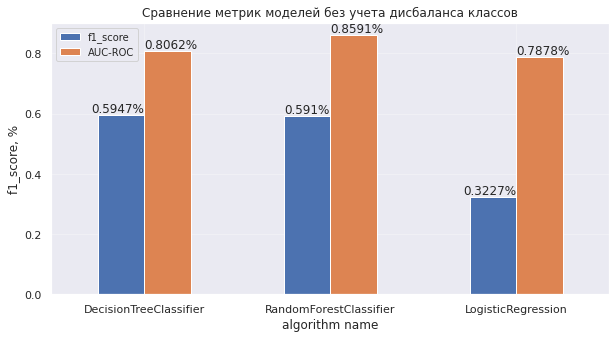

In [87]:
pivot_table = pd.DataFrame(
    {'algorithm_name':model_name, 'f1_score':best_f1_score, 'AUC-ROC':best_auc_roc}).plot(
    kind='bar', legend=True, figsize=(10,5), x='algorithm_name'
)

for index in range(len(best_f1_score)):
    height = best_f1_score[index]
    plt.text(index, height, str(round(height, 4)) + '%', ha='right', va='bottom')

for index in range(len(best_auc_roc)):
    height = best_auc_roc[index]
    plt.text(index, height, str(round(height, 4)) + '%', ha='left', va='bottom')

plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', prop={'size':10}) 
plt.xticks(rotation=0)
plt.xlabel('algorithm name')
plt.ylabel('f1_score, %')
plt.title('Сравнение метрик моделей без учета дисбаланса классов')

plt.show()

> **Вывод**

In [88]:
print(f'Лучшая F1-мера = {round(best_f1_score[0], 4)} получена у алгоритма {model_name[0]} с параметрами {best_parameters[0]}')

Лучшая F1-мера = 0.5947 получена у алгоритма DecisionTreeClassifier с параметрами [10, 2, 8]


# 4. Борьба с дисбалансом

**4.1. Взвешивание классов**<br>
<a id='борьба_дисбаланс_задание'></a>
[К содержанию](#борьба_дисбаланс)

**a)** Придание объектам редкого класса большего веса при помощи аргумента **class_weight='balanced'**.

In [89]:
best_bd_f1_score = []
best_bd_auc_roc = []
best_bd_parameters = []

**Алгоритм "Дерево решений"**

In [90]:
dtc_bd_best_parameters = []
dtc_bd_best_accuracy = 0
dtc_bd_best_f1_score = 0
dtc_bd_best_auc_roc = 0

In [91]:
%%time

for max_depth in tqdm(range(5, 15)):
    for min_samples_split in range(2, 10):
        for min_samples_leaf in range(1, 10):
            
            dtc_bd_model = DecisionTreeClassifier(
                random_state=RANDOM_STATE,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                criterion='gini',
                class_weight='balanced'
            )
                
            dtc_bd_model.fit(features_train, target_train)
            predictions = dtc_bd_model.predict(features_valid)
            dtc_f1_score = f1_score(target_valid, predictions)
               
            if dtc_f1_score > dtc_bd_best_f1_score:
                dtc_bd_best_parameters = [max_depth, min_samples_split, min_samples_leaf]
                dtc_db_best_accuracy = accuracy_score(target_valid, predictions)
                dtc_bd_best_f1_score = dtc_f1_score
                probabilities = dtc_bd_model.predict_proba(features_valid)
                probabilities_one = probabilities[:,1]
                dtc_bd_best_auc_roc = roc_auc_score(target_valid, probabilities_one)

100%|██████████| 10/10 [00:17<00:00,  1.74s/it]

CPU times: user 17.3 s, sys: 81.3 ms, total: 17.4 s
Wall time: 17.4 s


In [92]:
best_bd_f1_score.append(dtc_bd_best_f1_score)
best_bd_auc_roc.append(dtc_bd_best_auc_roc)
best_bd_parameters.append(dtc_bd_best_parameters)

In [93]:
print(f'лучшая F1-мера: {dtc_bd_best_f1_score},\n \
AUC-ROC: {dtc_bd_best_auc_roc},\n \
точность (accuracy): {dtc_bd_best_accuracy}')
print()
print(f'лучшие параметры модели: \n \
    глубина: {dtc_bd_best_parameters[0]},\n \
    объекты в узле: {dtc_bd_best_parameters[1]},\n \
    объекты в листе: {dtc_bd_best_parameters[2]}')

лучшая F1-мера: 0.5788067675868209,
 AUC-ROC: 0.8410691122555529,
 точность (accuracy): 0

лучшие параметры модели: 
     глубина: 6,
     объекты в узле: 2,
     объекты в листе: 3


**Вывод**<br>
полученная наилучшая F1-мера классификатора не удовлетворяет поставленной задаче -<br>
"*построить модель с предельно большим значением F1-меры (довести метрику до 0.59)*".

**Алгоритм "Случайный лес"**

In [94]:
rfc_bd_best_parameters = []
rfc_bd_best_accuracy = []
rfc_bd_best_f1_score = 0
rfc_bd_best_auc_roc = 0

In [ ]:
#time.sleep(1)
    
#for n_estimators in tqdm(range(10, 40, 2)):
#    for max_depth in range(5, 15):
#        for min_samples_split in range(2, 10):
#            for min_samples_leaf in range(1, 10):
#                rfc_bd_model = RandomForestClassifier(
#                    random_state=RANDOM_STATE,
#                    n_estimators=n_estimators,
#                    max_depth=max_depth,
#                    min_samples_split=min_samples_split,
#                    min_samples_leaf=min_samples_leaf,
#                    criterion='gini',
#                    class_weight='balanced'
#                ) 
#                
#                rfc_bd_model.fit(features_train, target_train)
#                predictions = rfc_bd_model.predict(features_valid)
#                rfc_f1_score = f1_score(target_valid, predictions)
#                                                    
#                if rfc_f1_score > rfc_bd_best_f1_score:
#                    rfc_bd_best_parameters = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
#                    rfc_bd_best_accuracy = accuracy_score(target_valid, predictions)
#                    rfc_bd_best_f1_score = rfc_f1_score
#                    probabilities = rfc_bd_model.predict_proba(features_valid)
#                    probabilities_one = probabilities[:,1]
#                    rfc_bd_best_auc_roc = roc_auc_score(target_valid, probabilities_one)

In [96]:
%%time
    
for n_estimators in tqdm(range(10, 40, 5)):
    for max_depth in range(8, 15):
        for min_samples_split in range(2, 7):
            rfc_bd_model = RandomForestClassifier(
                random_state=RANDOM_STATE,
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                criterion='gini',
                class_weight='balanced'
            )
            
            rfc_bd_model.fit(features_train, target_train)
            predictions = rfc_bd_model.predict(features_valid)
            rfc_f1_score = f1_score(target_valid, predictions)
                                                    
            if rfc_f1_score > rfc_bd_best_f1_score:
                rfc_bd_best_parameters = [n_estimators, max_depth, min_samples_split]
                rfc_bd_best_accuracy = accuracy_score(target_valid, predictions)
                rfc_bd_best_f1_score = rfc_f1_score
                probabilities = rfc_bd_model.predict_proba(features_valid)
                probabilities_one = probabilities[:,1]
                rfc_bd_best_auc_roc = roc_auc_score(target_valid, probabilities_one)

100%|██████████| 6/6 [00:30<00:00,  5.09s/it]

CPU times: user 30.3 s, sys: 214 ms, total: 30.5 s
Wall time: 30.6 s


In [97]:
best_bd_f1_score.append(rfc_bd_best_f1_score)
best_bd_auc_roc.append(rfc_bd_best_auc_roc)
best_bd_parameters.append(rfc_bd_best_parameters)

In [98]:
print(f'лучшая F1-мера: {rfc_bd_best_f1_score},\n \
AUC-ROC: {rfc_bd_best_auc_roc},\n \
точность (accuracy): {rfc_bd_best_accuracy}')
print()
print(f'лучшие параметры модели: \n \
    количество деревьев: {rfc_bd_best_parameters[0]},\n \
    глубина: {rfc_bd_best_parameters[1]},\n \
    объекты в узле: {rfc_bd_best_parameters[2]}')

лучшая F1-мера: 0.6530612244897959,
 AUC-ROC: 0.8568306364916535,
 точность (accuracy): 0.864

лучшие параметры модели: 
     количество деревьев: 25,
     глубина: 12,
     объекты в узле: 6


**Вывод**<br>
полученная наилучшая F1-мера классификатора удовлетворяет поставленной задаче -<br>
"*построить модель с предельно большим значением F1-меры (довести метрику до 0.59)*".<br>
Проверим для данной модели другие методы борьбы с дисбалансом с целью улучшить метрику.

**Алгоритм "Логистическая регрессия"**<br>

In [99]:
lr_bd_best_parameters = []
lr_bd_best_accuracy = 0
lr_bd_best_f1_score = 0
lr_bd_best_auc_roc = 0

In [100]:
%%time

for C in c_values:
    
    lr_bd_model = LogisticRegression(
        random_state=RANDOM_STATE,
        C=C,
        class_weight='balanced'
    )
    
    lr_bd_model.fit(features_train, target_train)
    predictions = lr_bd_model.predict(features_valid)
    lr_f1_score = f1_score(target_valid, predictions)
    
    if lr_f1_score > lr_bd_best_f1_score:
        lr_bd_best_parameters = [C]
        lr_bd_best_accuracy = accuracy_score(target_valid, predictions)
        lr_bd_best_f1_score = lr_f1_score
        probabilities = lr_bd_model.predict_proba(features_valid)
        probabilities_one = probabilities[:,1]
        lr_bd_best_auc_roc = roc_auc_score(target_valid, probabilities_one)

CPU times: user 10.8 s, sys: 29.3 s, total: 40 s
Wall time: 40.1 s


In [101]:
best_bd_f1_score.append(lr_bd_best_f1_score)
best_bd_auc_roc.append(lr_bd_best_auc_roc)
best_bd_parameters.append(lr_bd_best_parameters)

In [102]:
print(f'лучшая F1-мера: {lr_bd_best_f1_score},\n \
AUC-ROC: {lr_bd_best_auc_roc},\n \
точность (accuracy): {lr_bd_best_accuracy}')
print()
print(f'лучшие параметры модели: \n \
    параметр регуляризации C: {lr_bd_best_parameters[0]}')

лучшая F1-мера: 0.5269672855879752,
 AUC-ROC: 0.7937860819216753,
 точность (accuracy): 0.7325

лучшие параметры модели: 
     параметр регуляризации C: 0.0024201282647943836


**Вывод**<br>
полученная наилучшая F1-мера классификатора не удовлетворяет поставленной задаче -<br>
"*построить модель с предельно большим значением F1-меры (довести метрику до 0.59)*".

**b)** **Сравнение** полученных **F1-мер** классификаторов.

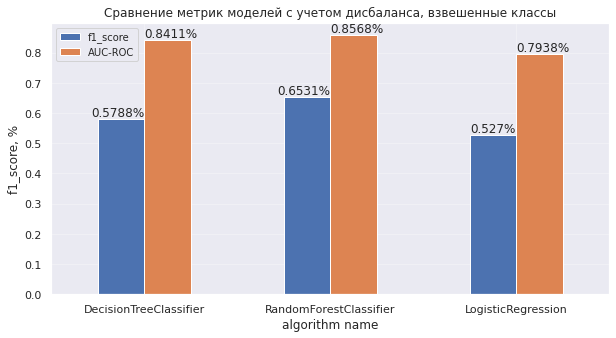

In [103]:
pivot_table = pd.DataFrame(
    {'algorithm_name':model_name, 'f1_score':best_bd_f1_score, 'AUC-ROC':best_bd_auc_roc}).plot(
    kind='bar', legend=True, figsize=(10,5), x='algorithm_name'
)

for index in range(len(best_bd_f1_score)):
    height = best_bd_f1_score[index]
    plt.text(index, height, str(round(height, 4)) + '%', ha='right', va='bottom')

for index in range(len(best_bd_auc_roc)):
    height = best_bd_auc_roc[index]
    plt.text(index, height, str(round(height, 4)) + '%', ha='left', va='bottom')

plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', prop={'size':10}) 
plt.xticks(rotation=0)
plt.xlabel('algorithm name')
plt.ylabel('f1_score, %')
plt.title('Сравнение метрик моделей с учетом дисбаланса, взвешенные классы')

plt.show()

> **Вывод**

In [104]:
print(
    f'Лучшая F1-мера = {round(best_bd_f1_score[1], 4)} получена у алгоритма \
{model_name[1]} с параметрами {best_bd_parameters[1]}'
)

Лучшая F1-мера = 0.6531 получена у алгоритма RandomForestClassifier с параметрами [25, 12, 6]


**4.2. Увеличение выборки (Upsampling)**<br>
<a id='upsampling_задание'></a>
[К содержанию](#upsampling)

**a)** Преувеличение количества наименьших классов и переобучение модели.

In [106]:
upsample = SMOTE(random_state=RANDOM_STATE)
features_upsampled, target_upsampled = upsample.fit_resample(features_train, target_train)

print('Измененный методом upsampling баланс классов:')
print(target_upsampled.value_counts())

Измененный методом upsampling баланс классов:
0    4777
1    4777
Name: exited, dtype: int64


In [107]:
best_up_f1_score = []
best_up_auc_roc = []
best_up_parameters = []

**Алгоритм "Дерево решений"**

In [108]:
dtc_up_best_parameters = []
dtc_up_best_accuracy = 0
dtc_up_best_f1_score = 0
dtc_up_best_auc_roc = 0

In [109]:
%%time

for max_depth in tqdm(range(5, 15)):
    for min_samples_split in range(2, 10):
        for min_samples_leaf in range(1, 10):
            
            dtc_up_model = DecisionTreeClassifier(
                random_state=RANDOM_STATE,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                criterion='gini'                
            )
                
            dtc_up_model.fit(features_upsampled, target_upsampled)
            predictions = dtc_up_model.predict(features_valid)
            dtc_f1_score = f1_score(target_valid, predictions)
               
            if dtc_f1_score > dtc_up_best_f1_score:
                dtc_up_best_parameters = [max_depth, min_samples_split, min_samples_leaf]
                dtc_up_best_accuracy = accuracy_score(target_valid, predictions)
                dtc_up_best_f1_score = dtc_f1_score
                probabilities = dtc_up_model.predict_proba(features_valid)
                probabilities_one = probabilities[:,1]
                dtc_up_best_auc_roc = roc_auc_score(target_valid, probabilities_one)

100%|██████████| 10/10 [00:29<00:00,  2.97s/it]

CPU times: user 28.4 s, sys: 177 ms, total: 28.6 s
Wall time: 29.7 s


In [110]:
best_up_f1_score.append(dtc_up_best_f1_score)
best_up_auc_roc.append(dtc_up_best_auc_roc)
best_up_parameters.append(dtc_up_best_parameters)

In [111]:
print(f'лучшая F1-мера: {dtc_up_best_f1_score},\n \
AUC-ROC: {dtc_up_best_auc_roc},\n \
точность (accuracy): {dtc_up_best_accuracy}')
print()
print(f'лучшие параметры модели: \n \
    глубина: {dtc_up_best_parameters[0]},\n \
    объекты в узле: {dtc_up_best_parameters[1]},\n \
    объекты в листе: {dtc_up_best_parameters[2]}')

лучшая F1-мера: 0.5888223552894213,
 AUC-ROC: 0.8291897444439817,
 точность (accuracy): 0.794

лучшие параметры модели: 
     глубина: 5,
     объекты в узле: 2,
     объекты в листе: 1


**Вывод**<br>
полученная наилучшая F1-мера классификатора не удовлетворяет поставленной задаче -<br>
"*построить модель с предельно большим значением F1-меры (довести метрику до 0.59)*".

**Алгоритм "Случайный лес"**

In [112]:
rfc_up_best_parameters = []
rfc_up_best_accuracy = 0
rfc_up_best_f1_score = 0
rfc_up_best_auc_roc = 0

In [114]:
%%time
    
for n_estimators in tqdm(range(10, 40, 5)):
    for max_depth in range(8, 15):
        for min_samples_split in range(2, 7):
            rfc_up_model = RandomForestClassifier(
                random_state=RANDOM_STATE,
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                criterion='gini'
            )
            
            rfc_up_model.fit(features_upsampled, target_upsampled)
            predictions = rfc_up_model.predict(features_valid)
            rfc_f1_score = f1_score(target_valid, predictions)
                                                    
            if rfc_f1_score > rfc_up_best_f1_score:
                rfc_up_best_parameters = [n_estimators, max_depth, min_samples_split]
                rfc_up_best_accuracy = accuracy_score(target_valid, predictions)
                rfc_up_best_f1_score = rfc_f1_score
                probabilities = rfc_up_model.predict_proba(features_valid)
                probabilities_one = probabilities[:,1]
                rfc_up_best_auc_roc = roc_auc_score(target_valid, probabilities_one)

100%|██████████| 6/6 [00:45<00:00,  7.59s/it]

CPU times: user 45.2 s, sys: 329 ms, total: 45.5 s
Wall time: 45.5 s


In [115]:
best_up_f1_score.append(rfc_up_best_f1_score)
best_up_auc_roc.append(rfc_up_best_auc_roc)
best_up_parameters.append(rfc_up_best_parameters)

In [116]:
print(f'лучшая F1-мера: {rfc_up_best_f1_score},\n \
AUC-ROC: {rfc_up_best_auc_roc},\n \
точность (accuracy): {rfc_up_best_accuracy}')
print()
print(f'лучшие параметры модели: \n \
    количество деревьев: {rfc_up_best_parameters[0]},\n \
    глубина: {rfc_up_best_parameters[1]},\n \
    объекты в узле: {rfc_up_best_parameters[2]}')

лучшая F1-мера: 0.6226203807390818,
 AUC-ROC: 0.8528034968712935,
 точность (accuracy): 0.8315

лучшие параметры модели: 
     количество деревьев: 10,
     глубина: 14,
     объекты в узле: 2


**Вывод**<br>
полученная наилучшая F1-мера классификатора удовлетворяет поставленной задаче -<br>
"*построить модель с предельно большим значением F1-меры (довести метрику до 0.59)*".<br>
Но показатель F1-меры ниже, чем при взвешивании классов.

**Алгоритм "Логистическая регрессия"**<br>

In [117]:
lr_up_best_parameters = []
lr_up_best_accuracy = 0
lr_up_best_f1_score = 0
lr_up_best_auc_roc = 0

In [118]:
%%time

for C in c_values:
    
    lr_up_model = LogisticRegression(
        random_state=RANDOM_STATE,
        C=C
    )
    
    lr_up_model.fit(features_upsampled, target_upsampled)
    predictions = lr_up_model.predict(features_valid)
    lr_f1_score = f1_score(target_valid, predictions)
    
    if lr_f1_score > lr_up_best_f1_score:
        lr_up_best_parameters = [C]
        lr_up_best_accuracy  = accuracy_score(target_valid, predictions)
        lr_up_best_f1_score = lr_f1_score
        probabilities = lr_up_model.predict_proba(features_valid)
        probabilities_one = probabilities[:,1]
        lr_up_best_auc_roc = roc_auc_score(target_valid, probabilities_one)

CPU times: user 12.9 s, sys: 34.6 s, total: 47.5 s
Wall time: 47.6 s


In [119]:
best_up_f1_score.append(lr_up_best_f1_score)
best_up_auc_roc.append(lr_up_best_auc_roc)
best_up_parameters.append(lr_up_best_parameters)

In [120]:
print(f'лучшая F1-мера: {lr_up_best_f1_score},\n \
AUC-ROC: {lr_up_best_auc_roc},\n \
точность (accuracy): {lr_up_best_accuracy}')
print()
print(f'лучшие параметры модели: \n \
    параметр регуляризации C: {lr_up_best_parameters[0]}')

лучшая F1-мера: 0.5252525252525253,
 AUC-ROC: 0.7924997416522841,
 точность (accuracy): 0.7415

лучшие параметры модели: 
     параметр регуляризации C: 0.0009111627561154887


**Вывод**<br>
полученная наилучшая F1-мера классификатора не удовлетворяет поставленной задаче -<br>
"*построить модель с предельно большим значением F1-меры (довести метрику до 0.59)*".

**b)** **Сравнение** полученных **F1-мер** классификаторов.

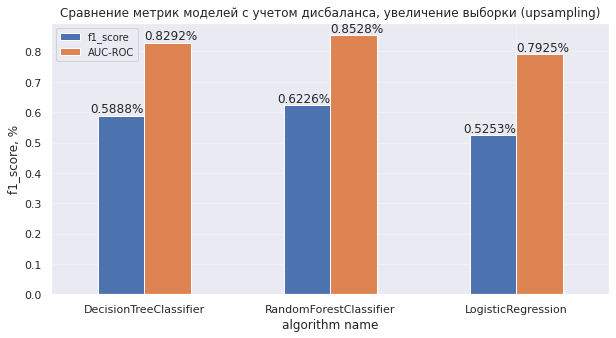

In [121]:
pivot_table = pd.DataFrame(
    {'algorithm_name':model_name, 'f1_score':best_up_f1_score, 'AUC-ROC':best_up_auc_roc}).plot(
    kind='bar', legend=True, figsize=(10,5), x='algorithm_name'
)

for index in range(len(best_up_f1_score)):
    height = best_up_f1_score[index]
    plt.text(index, height, str(round(height, 4)) + '%', ha='right', va='bottom')

for index in range(len(best_up_auc_roc)):
    height = best_up_auc_roc[index]
    plt.text(index, height, str(round(height, 4)) + '%', ha='left', va='bottom')


plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', prop={'size':10})
plt.xticks(rotation=0)
plt.xlabel('algorithm name')
plt.ylabel('f1_score, %')
plt.title('Сравнение метрик моделей с учетом дисбаланса, увеличение выборки (upsampling)')

plt.show()

> **Вывод**

In [122]:
print(
    f'Лучшая F1-мера = {round(best_up_f1_score[1], 4)} \
получена у алгоритма {model_name[1]} с параметрами {best_up_parameters[1]}'
)

Лучшая F1-мера = 0.6226 получена у алгоритма RandomForestClassifier с параметрами [10, 14, 2]


**4.3. Уменьшение выборки (Downsampling)**<br>
<a id='downsampling_задание'></a>
[К содержанию](#downsampling)

**a)** Преуменьшение количества наименьших классов и переобучение модели.

In [124]:
downsample = RandomUnderSampler(random_state=RANDOM_STATE)
features_downsampled, target_downsampled = downsample.fit_resample(features_train, target_train)

print('Измененный методом downsampling баланс классов:')
print(target_downsampled.value_counts())

Измененный методом downsampling баланс классов:
0    1223
1    1223
Name: exited, dtype: int64


In [125]:
best_dn_f1_score = []
best_dn_auc_roc = []
best_dn_parameters = []

**Алгоритм "Дерево решений"**

In [126]:
dtc_dn_best_parameters = []
dtc_dn_best_accuracy = 0
dtc_dn_best_f1_score = 0
dtc_dn_best_auc_roc = 0

In [127]:
%%time

for max_depth in tqdm(range(5, 15)):
    for min_samples_split in range(2, 10):
        for min_samples_leaf in range(1, 10):
            
            dtc_dn_model = DecisionTreeClassifier(
                random_state=RANDOM_STATE,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                criterion='gini'
            )
                
            dtc_dn_model.fit(features_downsampled, target_downsampled)
            predictions = dtc_dn_model.predict(features_valid)
            dtc_f1_score = f1_score(target_valid, predictions)
               
            if dtc_f1_score > dtc_dn_best_f1_score:
                dtc_dn_best_parameters = [max_depth, min_samples_split, min_samples_leaf]
                dtc_dn_best_accuracy = accuracy_score(target_valid, predictions)
                dtc_dn_best_f1_score = dtc_f1_score
                probabilities = dtc_dn_model.predict_proba(features_valid)
                probabilities_one = probabilities[:,1]
                dtc_dn_best_auc_roc = roc_auc_score(target_valid, probabilities_one)

100%|██████████| 10/10 [00:09<00:00,  1.09it/s]

CPU times: user 8.85 s, sys: 34.1 ms, total: 8.88 s
Wall time: 9.16 s


In [128]:
best_dn_f1_score.append(dtc_dn_best_f1_score)
best_dn_auc_roc.append(dtc_dn_best_auc_roc)
best_dn_parameters.append(dtc_dn_best_parameters)

In [129]:
print(f'лучшая F1-мера: {dtc_dn_best_f1_score},\n \
AUC-ROC: {dtc_dn_best_auc_roc},\n \
точность (accuracy): {dtc_dn_best_accuracy}')
print()
print(f'лучшие параметры модели: \n \
    глубина: {dtc_dn_best_parameters[0]},\n \
    объекты в узле: {dtc_dn_best_parameters[1]},\n \
    объекты в листе: {dtc_dn_best_parameters[2]}')

лучшая F1-мера: 0.5964912280701754,
 AUC-ROC: 0.8447307091374889,
 точность (accuracy): 0.793

лучшие параметры модели: 
     глубина: 6,
     объекты в узле: 2,
     объекты в листе: 9


**Вывод**<br>
полученная наилучшая F1-мера классификатора удовлетворяет поставленной задаче -<br>
"*построить модель с предельно большим значением F1-меры (довести метрику до 0.59)*".

**Алгоритм "Случайный лес"**

In [130]:
rfc_dn_best_parameters = []
rfc_dn_best_accuracy = 0
rfc_dn_best_f1_score = 0
rfc_dn_best_auc_roc = 0

In [132]:
%%time
    
for n_estimators in tqdm(range(10, 40, 5)):
    for max_depth in range(8, 15):
        for min_samples_split in range(2, 7):
            rfc_dn_model = RandomForestClassifier(
                random_state=RANDOM_STATE,
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                criterion='gini'
            ) 
            
            rfc_dn_model.fit(features_downsampled, target_downsampled)
            predictions = rfc_dn_model.predict(features_valid)
            rfc_f1_score = f1_score(target_valid, predictions)
                                                    
            if rfc_f1_score > rfc_dn_best_f1_score:
                rfc_dn_best_parameters = [n_estimators, max_depth, min_samples_split]
                rfc_dn_best_accuracy = accuracy_score(target_valid, predictions)
                rfc_dn_best_f1_score = rfc_f1_score
                probabilities = rfc_dn_model.predict_proba(features_valid)
                probabilities_one = probabilities[:,1]
                rfc_dn_best_auc_roc = roc_auc_score(target_valid, probabilities_one)

100%|██████████| 6/6 [00:17<00:00,  2.93s/it]

CPU times: user 17.4 s, sys: 152 ms, total: 17.6 s
Wall time: 17.6 s


In [133]:
best_dn_f1_score.append(rfc_dn_best_f1_score)
best_dn_auc_roc.append(rfc_dn_best_auc_roc)
best_dn_parameters.append(rfc_dn_best_parameters)

In [134]:
print(f'лучшая F1-мера: {rfc_dn_best_f1_score},\n \
AUC-ROC: {rfc_dn_best_auc_roc},\n \
точность (accuracy): {rfc_dn_best_accuracy}')
print()
print(f'лучшие параметры модели: \n \
    количество деревьев: {rfc_dn_best_parameters[0]},\n \
    глубина: {rfc_dn_best_parameters[1]},\n \
    объекты в узле: {rfc_dn_best_parameters[2]}')

лучшая F1-мера: 0.6223506743737958,
 AUC-ROC: 0.8750198580707055,
 точность (accuracy): 0.804

лучшие параметры модели: 
     количество деревьев: 30,
     глубина: 10,
     объекты в узле: 3


**Вывод**<br>
полученная наилучшая F1-мера классификатора удовлетворяет поставленной задаче -<br>
"*построить модель с предельно большим значением F1-меры (довести метрику до 0.59)*".

**Алгоритм "Логистическая регрессия"**<br>

In [135]:
lr_dn_best_parameters = []
lr_dn_best_accuracy = 0
lr_dn_best_f1_score = 0
lr_dn_best_auc_roc = 0

In [136]:
%%time

for C in c_values:
    
    lr_dn_model = LogisticRegression(
        random_state=RANDOM_STATE,
        C=C
    )
    
    lr_dn_model.fit(features_downsampled, target_downsampled)
    predictions = lr_dn_model.predict(features_valid)
    lr_f1_score = f1_score(target_valid, predictions)
    
    if lr_f1_score > lr_dn_best_f1_score:
        lr_dn_best_parameters = [C]
        lr_dn_best_accuracy = accuracy_score(target_valid, predictions)
        lr_dn_best_f1_score = lr_f1_score 
        probabilities = lr_dn_model.predict_proba(features_valid)
        probabilities_one = probabilities[:,1]
        lr_dn_best_auc_roc = roc_auc_score(target_valid, probabilities_one)

CPU times: user 8.42 s, sys: 22.5 s, total: 30.9 s
Wall time: 30.9 s


In [137]:
best_dn_f1_score.append(lr_dn_best_f1_score)
best_dn_auc_roc.append(lr_dn_best_auc_roc)
best_dn_parameters.append(lr_dn_best_parameters)

In [138]:
print(f'лучшая F1-мера: {lr_dn_best_f1_score},\n \
AUC-ROC: {lr_dn_best_auc_roc},\n \
точность (accuracy): {lr_dn_best_accuracy}')
print()
print(f'лучшие параметры модели: \n \
    параметр регуляризации C: {lr_dn_best_parameters[0]}')

лучшая F1-мера: 0.5319148936170214,
 AUC-ROC: 0.7940621669435229,
 точность (accuracy): 0.736

лучшие параметры модели: 
     параметр регуляризации C: 0.006428073117284319


**Вывод**<br>
полученная наилучшая F1-мера классификатора не удовлетворяет поставленной задаче -<br>
"*построить модель с предельно большим значением F1-меры (довести метрику до 0.59)*".

**b)** **Сравнение** полученных **F1-мер** классификаторов.

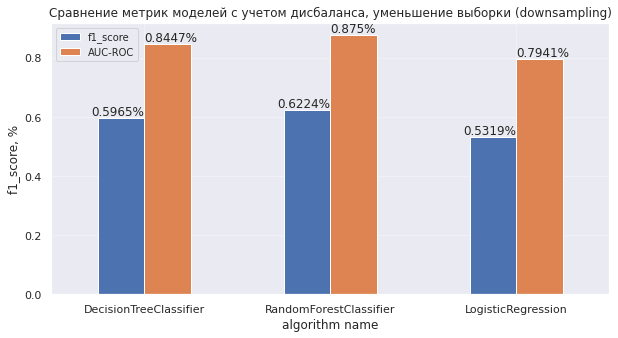

In [139]:
pivot_table = pd.DataFrame(
    {'algorithm_name':model_name, 'f1_score':best_dn_f1_score, 'AUC-ROC':best_dn_auc_roc}).plot(
    kind='bar', legend=True, figsize=(10,5), x='algorithm_name'
)

for index in range(len(best_dn_f1_score)):
    height = best_dn_f1_score[index]
    plt.text(index, height, str(round(height, 4)) + '%', ha='right', va='bottom')

for index in range(len(best_dn_auc_roc)):
    height = best_dn_auc_roc[index]
    plt.text(index, height, str(round(height, 4)) + '%', ha='left', va='bottom')    

plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', prop={'size':10})
plt.xticks(rotation=0)
plt.xlabel('algorithm name')
plt.ylabel('f1_score, %')
plt.title('Сравнение метрик моделей с учетом дисбаланса, уменьшение выборки (downsampling)')

plt.show()

> **Вывод**

In [140]:
print(
    f'Лучшая F1-мера = {round(best_dn_f1_score[1], 4)} \
получена у алгоритма {model_name[1]} с параметрами {best_dn_parameters[1]}'
)

Лучшая F1-мера = 0.6224 получена у алгоритма RandomForestClassifier с параметрами [30, 10, 3]


> **Выводы**

**Взвешивание классов**

In [141]:
print(
    f'Лучшая F1-мера = {round(best_bd_f1_score[1], 4)} получена у алгоритма \
{model_name[1]} с параметрами {best_bd_parameters[1]}'
)

Лучшая F1-мера = 0.6531 получена у алгоритма RandomForestClassifier с параметрами [25, 12, 6]


**Увеличение выборки (Upsampling)**

In [142]:
print(
    f'Лучшая F1-мера = {round(best_up_f1_score[1], 4)} \
получена у алгоритма {model_name[1]} с параметрами {best_up_parameters[1]}'
)

Лучшая F1-мера = 0.6226 получена у алгоритма RandomForestClassifier с параметрами [10, 14, 2]


**Уменьшение выборки (Downsampling)**

In [143]:
print(
    f'Лучшая F1-мера = {round(best_dn_f1_score[1], 4)} \
получена у алгоритма {model_name[1]} с параметрами {best_dn_parameters[1]}'
)

Лучшая F1-мера = 0.6224 получена у алгоритма RandomForestClassifier с параметрами [30, 10, 3]


# 5. Построение ROC-кривой и AUC-ROC лучшей модели
<a id='roc_модели_задание'></a>
[К содержанию](#roc_модели)

Построение ROC-кривой, расчет AUC-ROC для трех моделей, выбранных лучшими в разделе 4.

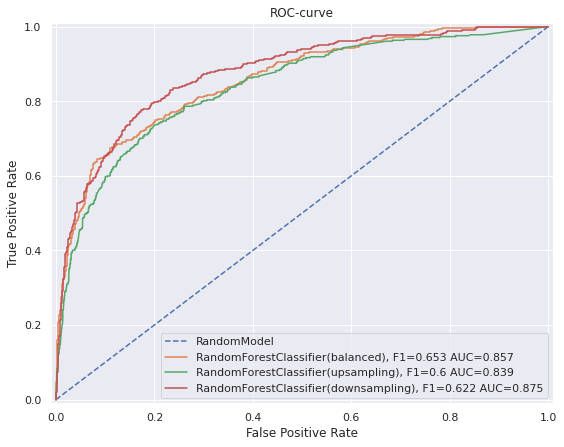

In [144]:
#Построение ROC-кривой для модели RandomForestClassifier(balanced)

result_model = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_estimators=25,
    max_depth=12,
    min_samples_split=6,
    criterion='gini',
    class_weight='balanced'
)

result_model.fit(features_train, target_train)

probabilities_valid = result_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

predictions = result_model.predict(features_valid)
result_model_f1_score = f1_score(target_valid, predictions)
result_model_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure(figsize=[9,7])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

plt.plot(fpr, tpr, label='RandomForestClassifier(balanced), ' +
         'F1=' + str(round(result_model_f1_score, 3)) + ' AUC=' + str(round(result_model_auc_roc, 3)))


#######
#Построение ROC-кривой для модели RandomForestClassifier(upsampling)

result_model_up = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_estimators=10,
    max_depth=14,
    min_samples_split=2,
    criterion='gini'
)

result_model_up.fit(features_upsampled, target_upsampled)

probabilities_valid = result_model_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

predictions = result_model_up.predict(features_valid)
result_model_up_f1_score = f1_score(target_valid, predictions)
result_model_up_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.plot(fpr, tpr, label='RandomForestClassifier(upsampling), ' +
         'F1=' + str(round(result_model_up_f1_score, 3)) + ' AUC=' + str(round(result_model_up_auc_roc, 3)))


#######
#Построение ROC-кривой для модели RandomForestClassifier(downsampling)

result_model_down = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_estimators=30,
    max_depth=10,
    min_samples_split=3,
    criterion='gini'
)

result_model_down.fit(features_downsampled, target_downsampled)

probabilities_valid = result_model_down.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

predictions = result_model_down.predict(features_valid)
result_model_down_f1_score = f1_score(target_valid, predictions)
result_model_down_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.plot(fpr, tpr, label='RandomForestClassifier(downsampling), ' +
         'F1=' + str(round(result_model_down_f1_score, 3)) + ' AUC=' + str(round(result_model_down_auc_roc, 3)))


plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

#plt.text(0.15,0.65,'AUC_ROC = {:.2f}, F1_score = {:.2f}'.format(result_model_auc_roc, result_model_f1_score))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')

plt.title('ROC-curve')

plt.show()

> **Вывод**

- Roc-кривая модели **RandomForestClassifier(downsampling)** больше охватывает левый верхний угол первой четверти декартовой системы координат, показатель AUC = 0.87 выше относительно остальных моделей.
- Показатель F1-меры = 0.65 выше у модели **RandomForestClassifier(balanced)**.
- Проверим на тестовой выборке две модели:<br>
RandomForestClassifier(balanced) с параметрами: количество деревьев - 25, глубина - 12, объекты в узле - 6;<br>
RandomForestClassifier(downsampling) с параметрами: количество деревьев - 30, глубина - 10, объекты в узле - 3.

# 6. Проверка модели на тестовой выборке
<a id='проверка_модели_задание'></a>
[К содержанию](#проверка_модели)

**RandomForestClassifier(balanced)**

**6.1.** Обучение выбранной модели на обучающем и валидационном наборах.

In [145]:
features_full_train = pd.concat([features_train, features_valid])
target_full_train = pd.concat([target_train, target_valid])

In [146]:
result_model = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_estimators=25,
    max_depth=12,
    min_samples_split=6,
    criterion='gini',
    class_weight='balanced'
)

result_model.fit(features_full_train, target_full_train)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_split=6, n_estimators=25,
                       random_state=12345)

**6.2.** Вычисление точности классификатора, F1-меры для тестового набора.

In [147]:
predictions_test = result_model.predict(features_test)
result_accuracy = accuracy_score(target_test, predictions_test)
result_f1_score = f1_score(target_test, predictions_test)

print('Точность классификатора RandomForestClassifier(balanced) для тестового набора: {:.4f}'.format(result_accuracy))
print('F1-мера классификатора RandomForestClassifier(balanced) для тестового набора: {:.4f}'.format(result_f1_score))

Точность классификатора RandomForestClassifier(balanced) для тестового набора: 0.8530
F1-мера классификатора RandomForestClassifier(balanced) для тестового набора: 0.6297


In [148]:
probabilities_test = result_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
result_model_auc_roc_test = roc_auc_score(target_test,probabilities_one_test)

print(
    'ROC-AUC классификатора RandomForestClassifier(balanced) для тестового набора: {:.4f}'.
    format(result_model_auc_roc_test)
)

ROC-AUC классификатора RandomForestClassifier(balanced) для тестового набора: 0.8620


**RandomForestClassifier(downsampling)**

**6.1.** Обучение выбранной модели на обучающем и валидационном наборах.

In [149]:
features_full_downsampled, target_full_downsampled = downsample.fit_resample(features_full_train, target_full_train)

In [150]:
result_model_down = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_estimators=30,
    max_depth=10,
    min_samples_split=3,
    criterion='gini'
)

result_model_down.fit(features_full_downsampled, target_full_downsampled)

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=30,
                       random_state=12345)

**6.2.** Вычисление точности классификатора, F1-меры для тестового набора.

In [151]:
predictions_test = result_model_down.predict(features_test)
result_accuracy_down = accuracy_score(target_test, predictions_test)
result_f1_score_down = f1_score(target_test, predictions_test)

print('Точность классификатора RandomForestClassifier(downsampling) для тестового набора: {:.4f}'.format(result_accuracy_down))
print('F1-мера классификатора RandomForestClassifier(downsampling) для тестового набора: {:.4f}'.format(result_f1_score_down))

Точность классификатора RandomForestClassifier(downsampling) для тестового набора: 0.8005
F1-мера классификатора RandomForestClassifier(downsampling) для тестового набора: 0.6053


In [152]:
probabilities_test = result_model_down.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
result_model_auc_roc_test_down = roc_auc_score(target_test,probabilities_one_test)

print(
    'ROC-AUC классификатора RandomForestClassifier(downsampling) для тестового набора: {:.4f}'.
    format(result_model_auc_roc_test_down)
)

ROC-AUC классификатора RandomForestClassifier(downsampling) для тестового набора: 0.8586


> **Выводы**

- **Модель RandomForestClassifier(balanced)** с параметрами: количество деревьев - 25, глубина - 12, объекты в узле - 6<br>
 **Accuracy** для тестового набора: **0.8530**<br>
 **F1-мера** для тестового набора: **0.6297**<br>
 **ROC-AUC** для тестового набора: **0.8620**<br><br>
- **Модель RandomForestClassifier(downsampling)** с параметрами: количество деревьев - 30, глубина - 10, объекты в узле - 3<br>
 **Accuracy** для тестового набора: **0.8005**<br>
 **F1-мера** для тестового набора: **0.6053**<br>
 **ROC-AUC** для тестового набора: **0.8586**

- **На тестовом наборе показатели выше у модели RandomForestClassifier(balanced)** с параметрами: количество деревьев - 25, глубина - 12, объекты в узле - 6.

**6.3.** Сравнение качества предсказаний с константной моделью.<br>
<a id='константная_модель_задание'></a>
[К содержанию](#константная_модель)

In [154]:
dummy_clf_model = DummyClassifier(strategy='constant', constant=1)
dummy_clf_model.fit(features_full_train, target_full_train)

dummy_predictions = dummy_clf_model.predict(features_test)

print('Уникальные предсказываемые классы:', (np.unique(dummy_predictions)))
print('Accuracy классификатора константной модели: {:.4f}'.format(accuracy_score(target_test, dummy_predictions)))
print('F1-мера классификатора константной модели: {:.4f}'.format(f1_score(target_test, dummy_predictions)))

Уникальные предсказываемые классы: [1]
Accuracy классификатора константной модели: 0.2035
F1-мера классификатора константной модели: 0.3382


*Можно сделать вывод, что построенная модель RandomForestClassifier(balanced) действительно дает прирост качества (предсказывает уход клиента лучше случайной модели).*

**6.4.** Вывод отчета о классификации. Создание кривой Precision-Recall для выбранной модели.

**a)** Расчет основных показателей классификации.

In [158]:
predictions_test = result_model.predict(features_test)

print('Основные показатели классификации')
print()
print(classification_report(target_test, predictions_test, target_names=['0', '1']))

Основные показатели классификации

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1593
           1       0.65      0.61      0.63       407

    accuracy                           0.85      2000
   macro avg       0.77      0.76      0.77      2000
weighted avg       0.85      0.85      0.85      2000



Из всех клиентов, которые действительно прекратили сотрудничество с банком, **модель правильно предсказала результат для 61% таких клиентов**.

**b)** PR-кривая для выбранной модели.

In [156]:
probabilities_test = result_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

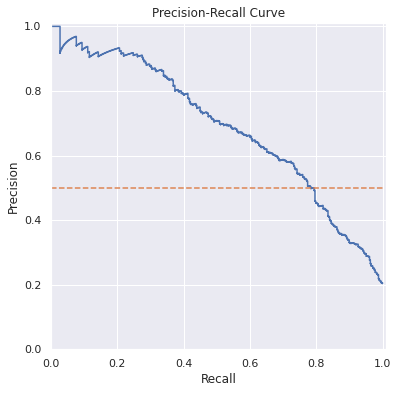

In [157]:
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_one_test)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.01])

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title('Precision-Recall Curve')

#модель без навыков
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

plt.show() 

Как уже было указано выше, построенная модель дает прирост качества.

> **Выводы**

- Проанализировано три алгоритма решения задач классификации: **'DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression'**.
- Каждая из моделей была обучена для нескольких сочетаний гиперпараметров как без учета дисбаланса, так и с учетом дисбаланса (методы борьбы с дисбалансом классов: взвешивание классов, upsampling, downsampling).
- **Критериями проверки качества** моделей были выбраны параметры **accuracy**, **F1-мера**, **ROC-AUC**.
- Для каждой вариации обучения моделей были рассчитаны указанные параметры с последующим выбором наилучшего показателя.
- **Наилучшая F1-мера** была достигнута для **модели случайного леса** с гиперпараметрами: criterion='gini', n_estimators=25, max_depth=12, min_samples_leaf=6, **class_weight='balanced'**.
- Полученные значения **F1-меры: на валидационном наборе - 0.65, на тестовом наборе - 0.63**, что удовлетворяет условиям поставленной задачи.

# 7. Общий вывод по проекту
<a id='общий_вывод_задание'></a>
[К содержанию](#общий_вывод)

1. Предварительное изучение данных:
- в датафрейме **10000 записей, 14 полей**;
- при предварительном изучении данных был выявлен ряд проблем, таких как пропущенные значения в поле Tenure, наличие полей, **RowNumber**, **CustomerId**, **Surname**, не вносящих смысловой нагрузки в модель, наличие полей, для которых виделось возможным изменения типа данных, замены классификации более краткими обозначениями для снижения нагрузки и удобства визуализации данных. В ходе обработки данных проблемы устранены;
- доля выбросов по каждому признаку в выборке не превышает 3%; данные выбросы выглядят вполне реалистично, их можно отнести к контекстным выбросам;
- исходя из особенностей выборки **данные оставили без изменений (выбросы не удалены)**;
- **некорректные значения** в полях, содержащих категориальные значения, **отсутствуют**.
- каждый год наблюдается незначительный прирост клиентов банка, имеется существенная необходимость в удержании старых клиентов. 
- количество активных и неактивных клиентов банка отличается незначительно. *Требуется уточнение у маркетологов, что подразумевается под активностью*.
- за период, соответствующий выборке, с банком прекратили сотрудничество 20% клиентов.
- доля клиентов, использующих более 3 продуктов банка - 3.26%. Доля клиентов, использующих только 1 продукт и прекративших сотрудничество с банком - 14%. *Следует пересмотреть продуктовую линию*.

2. Разбивка данных на выборки:
- выполнено **one-hot кодирование** категориальные признаков в выборке;
- **масштабирование** количественных признаков;
- в выборке выделены признаки (features) и целевой признак (target);
- изучен целевой признак на сбалансированность, соотношение классов 1:4, признак не сбалансирован;
- данные разбиты на **три набора** (обучающий, валидационный, тестовый) в пропорции **3:1:1** соответственно.<br><br>

3. Построение моделей для задач классификации:
- проанализировано три алгоритма решения задач классификации: **'DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression'**;
- каждая из моделей была обучена для нескольких сочетаний гиперпараметров как **без учета дисбаланса**, так и **с учетом дисбаланса** (методы борьбы с дисбалансом классов: взвешивание классов, upsampling, downsampling);
- **критериями проверки качества** моделей были выбраны **параметры accuracy, F1-мера, ROC-AUC**;
- для каждой вариации обучения моделей были рассчитаны указанные параметры с последующим выбором наилучшего показателя;
- **наилучшая F1-мера** была достигнута для **модели случайного леса** с гиперпараметрами: criterion='gini', n_estimators=25, max_depth=12, min_samples_leaf=6, **class_weight='balanced'**;
- полученные значения **F1-меры: на валидационном наборе - 0.65, на тестовом наборе - 0.63**, что удовлетворяет условиям поставленной задачи;
- дополнительно была построена **ROC-кривая** и рассчитана метрика **AUC-ROC** лучшей модели;
- выполнена проверка на адекватность итоговой модели с помощью константной модели **DummyClassifier**.